# **Chapter 9: Metabolism**

## ***Learning Objectives:***

* Derive the Michaelis-Menten equation for enzyme kinetics

* Adapt the equation to account for inhibitory effects

* Build large-scale metabolic models based on principles of flux balance and linear
optimization

* Apply flux balance analysis to predicting the metabolic behavior of cells


This is an exciting chapter for me; it not only features some of the most classical and well-established modeling in molecular biology, but it also showcases some of the newest and most exciting modeling approaches that played a critical role in building a whole-cell model, as you will see in Chapter 10. We will focus on metabolism, specifically carbon and energy metabolism, meaning the processes by which a cell builds all of the molecules necessary to grow and divide.

## **Section 9.1. Cellular metabolism**

For example, E. coli’s metabolic network enables each individual cell to create a nearly perfect copy of itself. This copy includes more than two million proteins, a DNA molecule over four and a half megabase pairs long, and specialized components like the cell membrane and the flagellum (Figure 9.1). All of these components are created from an external environment containing only glucose and a handful of salts (sodium phosphate, potassium phosphate, magnesium sulfate, sodium chloride, ammonium chloride, calcium chloride), all within one hour (sometimes as quickly as 20 min!).

![Figure 9.1](https://drive.google.com/uc?export=view&id=1AH0YSFaYbYakfDtpT5L4ThTsU9jXHusB)

> **Figure 9.1. Schematic of the higher-level structure of the metabolic network of *E. coli.*** The general reaction categories appear at the top of the figure, and the general output categories appear at the bottom. Note the hierarchical dependence of this metabolic network; the “upstream” components are required to generate the “downstream” components. Modified with permission from Neidhardt, F. C., Ingraham, J. L., Schaechter, M. *Physiology of the Bacterial Cell: A Molecular Approach.* Sinauer Associates Inc., 1990. Copyright © 1992 International Union of Biochemistry and Molecular Biology, Inc.

First, several chemical reactions break down glucose and phosphate to produce free carbon, energy sources such as **ATP**, and **reducing power** (a store of electrons that can be donated to chemical reactions). If you’ve taken a biochemistry course, you know these reactions as **glycolysis** and the **tricarboxylic acid (TCA) cycle** (also known as the Krebs cycle or the citric acid cycle). The products of these reactions, together with sulfate and ammonium, react to produce the four major building blocks of the cell: fatty acids, sugars, amino acids, and nucleotides. These building blocks come together in various ways to produce the macromolecules of the cell, which in turn comprise the major specialized structures and, ultimately, *E. coli* itself (Figure 9.1).


## **Section 9.2. Metabolic reactions**

Let’s look at one of the reactions in more detail to get a sense of its components (Figure 9.2). First, we see the molecular reactants and products: phosphoenolpyruvate (PEP), ADP, and a hydrogen ion react to form pyruvate and ATP. This reaction requires the catalyzing power of the enzyme pyruvate kinase. Two pyruvate kinase genes are encoded in the *E. coli* genome, and the functional protein is built out of four of either of these gene products. When an enzyme and the reactants are present in the cell, a chemical reaction can proceed (Figure 9.2).

One major difference between metabolism and the other processes we’ve studied in this book is that the enzymes, reactants, and reactions are incredibly well conserved between organisms. We share most of our metabolic network even with microbes – an observation that led the Nobel Laureate Jacques Monod to assert, “Anything found to be true of E. coli must also be true of elephants.” However, in order to translate what we learn from parasites to pachyderms, we need to form consistent connections between what we learn in each organism.

Fortunately for us, the biochemistry community has already adopted a single standard notation to describe reactions, whether they occur in *Triponema* or the tarantula: the **Enzyme Commission** (EC) number, which uniquely specifies a reaction in a hierarchical fashion. For example, the pyruvate kinase reaction EC number is 2.7.1.40. The ‘2’ means that pyruvate kinase is a transferase; it transfers a phosphate group (the ‘7’) to an alcohol group (the ‘1’) with the specific reactants and products shown in Figure 9.2 (‘40’). Since these reactions generally occur in many organisms and cells, even though the genes and corresponding proteins that catalyze the reactions may not be conserved, the EC number is a convenient way to compare metabolic capacity between organisms. You’ll soon see that it becomes useful for model building as well.

![Figure 9](https://drive.google.com/uc?export=view&id=1uAhjrP1319ri-OkSbaW9tOkdO2tcyUU5)

> **Figure 9.2. The components of the pyruvate kinase reaction.** The two small molecules phosphoenolpyruvate and ADP react, with the addition of a hydrogen ion, to form the products pyruvate and ATP. This reaction depends on the enzyme pyruvate kinase. Note the EC number below the enzyme, which provides a unique categorization of the reaction regardless of the host organism or even which enzyme catalyzes it.

These reactions were studied individually by biochemists over many years, but for our purposes we are especially interested in putting them in context, first in pathways, and then in networks. Pyruvate kinase, for example, is at the end of the glycolysis pathway, a fueling reaction (Figure 9.3). This pathway starts with the six-carbon glucose molecule, which is charged with two phosphate groups and converted to fructose 1,6-bisphosphate, after which it is split in half and used to generate four charged ATP molecules and reducing power in the form of NADH.

![Figure 9](https://drive.google.com/uc?export=view&id=1dfIRryZiXDyzSmy6YKaBt2QlLP6_1izK)

> **Figure 9.3. The pyruvate kinase reaction is highlighted in the context of the glycolytic pathway in *E. coli.*** The glycolytic pathway begins with glucose as a substrate, which is processed through a number of chemical reactions, each catalyzed by one or more enzymes in the cell, until its eventual conversion to pyruvate via pyruvate kinase. Note from the arrows that some reactions are bidirectional, while others only proceed in the forward direction.

Glycolysis is only one of the many pathways in the full *E. coli* metabolic network (Figure 9.4). Some of the pathways are mostly linear, such as the amino acid biosynthesis pathways; others are cyclic, such as the energy-generating TCA cycle. A substantial fraction of the reactions involve multiple reactants, and a handful of **metabolites** are involved in the lion’s share of the reactions (such as ATP). Note that we didn’t observe long pathways or cycles as motifs in the transcriptional regulatory network (Chapter 7).

![Figure 9](https://drive.google.com/uc?export=view&id=1iOYNcKKfahYvRIL0QXv6w6QUvw48lh2U)

> **Figure 9.4. Schematic placing the glycolytic pathway in the context of the entire metabolic network of *E. coli.*** The small black circles represent small molecules, and the lines represent chemical reactions. The glycolytic pathway is highlighted in red. The dashed lines indicate that this complex network extends well beyond what is shown here. Figure generated using SEED: Overbeek et al. The subsystems approach to genome annotation and its use in the project to annotate 1000 genomes. *Nucleic Acids Research.* 2005. **33**(17): 5691-702.

## **Section 9.3. Compartment models of metabolite concentration**

How can we model such a complicated network? We’ll start with the standard mass balance compartment models that we used in Chapter 3, and I’ll spend the first part of the chapter going over those approaches.


Let’s say that you are interested in the concentration of a particular metabolite M in the cell; we’ll call the metabolite pool the compartment $dM/dt$. Just as with all of the compartment models we built previously, there are some ways for the metabolite to be produced, and other ways for it to be lost (Figure 9.5). The metabolite concentration increases as reactions produce it, or decreases as the metabolite is used as a reactant in other reactions. The metabolite concentration can also increase or decrease as it is transported into or out of the cell.

If we put all of these together, we obtain:

> <h3> $ \frac{d[M]}{dt} = v_{prod} - v_{loss} + v_{trans,in} - v_{trans,out}$

*(Equation 9.1)*

![Figure 9](https://drive.google.com/uc?export=view&id=1GtYARIjVbjQ9tF1yMeMq0N4gz015Ug8a)

> **Figure 9.5. The compartment model for the concentration of a metabolite.** A metabolite M can be produced or lost by chemical transformations, or transported into or out of the cell through channels in the cell membrane. The rates of production, loss, and transport are given by $v_{prod}$, $v_{loss}$, and $v_{trans}$, respectively.

## **Section 9.4. The Michaelis-Menten equation for enzyme kinetics**

How do we represent the terms in Figure 9.5? Based on what we’ve already covered, you may first try a mass action-based approach, like vloss = kMloss*[M], or possibly vloss = kMloss*[M] *[E], where E is the enzyme that uses metabolite M. However, this strategy doesn’t explicitly account for the mechanism of enzyme-substrate binding. Consider the following chemical reaction between an enzyme and a single substrate to form a product:

> <h3> $
E + S \underset{k_{-1}}{\stackrel{k_{1}}{\rightleftharpoons}} C \stackrel{k_{2}}{\rightarrow} E + P
$

*(Equation 9.2)*


Here, enzyme E and substrate S bind to form a complex C, which can dissociate back to E and S or react to form a new product P and release the free enzyme. Notice that
three kinetic parameters characterize this system: $k_f$ and $k_r$ for association and dissociation, respectively, and $k_{cat}$ for the reaction. Note also that the second reaction is considered to be irreversible.


You should now be able to write out the four equations that describe the conservation of E, S, C, and P:

> <h3> $
\frac{d[S]}{dt} = k_r [C] - k_f [S][E]
$

> <h3> $
\frac{d[E]}{dt} = (k_r + k_{cat})[C] - k_f [S][E]
$

> <h3> $
\frac{d[C]}{dt} = k_f [S][E] - (k_r + k_{cat})[C]
$

> <h3> $
\frac{d[P]}{dt} = k_r [C]
$

*(Equations 9.3-9.6)*


We can also define the initial conditions that $[E](t = 0) = E_0$, $[S](t = 0) = S_0$, and $[C](t = 0) = [P](t = 0) = 0$.
Take a look at Equations 9.3-9.6. Which one seems to correspond to the vprod (or vloss) that we are trying to derive? The answer is Equation 9.6, $d[P]/dt$. We want to determine the rate at which product is formed by the reaction. Since we know that this rate is equal to $k_{cat}[C]$, we only need to solve Equations 9.3-9.5 for S, E, and C to find our answer.

Next, take a closer look at $d[E]/dt$ (Equation 9.4) and $d[C]/dt$ (Equation 9.5). Notice anything? One equation is the opposite of the other:

> <h3> $
\frac{d[E]}{dt} = -\frac{d[C]}{dt}
$

*(Equation 9.7)*


or:

> <h3> $
\frac{d[E]}{dt} + \frac{d[C]}{dt} = 0
$

*(Equation 9.8)*


Since the change in the concentration of E will lead to an equal and opposite change in the concentration of C, the sum of $[E]$ and $[C]$ at any time must equal the sum of $[E]$ and $[C]$ at any other time – including time zero! This relationship yields another interesting conservation statement:

> $
  [E](t)+[C](t) = [E](0) + [C](0)  
$

*(Equation 9.9)*


or, since $[c](0) = 0$:

> $
[E](t) = [E_0] - [C](t)
$

*(Equation 9.10)*


With Equation 9.10, we no longer need to solve both Equations 9.4 and 9.5, just one of
them. As a result, we will solve only these two equations:

> $
\frac{d[S]}{dt} = k_r [C] - k_f [S][E]
$

*(Equation 9.11)*


> $
\frac{d[C]}{dt} = k_f [S][E] - (k_r + k_{cat})[C]
$

*(Equation 9.12)*


To help us to solve these equations efficiently, we need to do a little bit of variable definition and substitution. Let’s define a term r as the ratio of complex to initial enzyme concentration:

>$
r = \frac{[C]}{[E_0]}
$

*(Equation 9.13)*


or

> $
[C] = [E_0] r
$

*(Equation 9.14)*



Substituting into Equation 9.11, we obtain:

> $
\frac{d[S]}{dt} = k_r [E_0] r - k_f [S][E]
$

*(Equation 9.15)*


Remembering that $[E](t) = [E0] – [C](t) = [E_0] – [E_0]*r$, we substitute to find:


> $
\frac{d[S]}{dt} = k_r [E_0] r - k_f [S] \left( [E_0] - [E_0] r \right) = [E_0] \left( k_r r - k_f (1 - r) [S] \right)
$

*(Equation 9.16)*


Now let’s take a look at Equation 9.12, where we can make a number of similar substitutions to obtain a new equation for r:

> $
\frac{dr}{dt} = \left( \frac{1}{[E_0]} \right) \frac{d[C]}{dt} = k_f [S] \left( \frac{[E_0] - [C]}{[E_0]} \right) - \left( k_r + k_{cat} \right) \left( \frac{[C]}{[E_0]} \right)
$
$
= k_f (1 - r)[S] - (k_r + k_{cat}) r
$

*(Equation 9.17)*


If you compare Equation 9.16 with Equation 9.17, you’ll see that their forms are very similar. Both equations have a $k_f (1-r)[S]$ term, and both have a kr*r term, for example. The most notable difference between the two equations is that the entire right side of Equation 9.16 is multiplied by $[E_0]$. This difference is something we might be able to use to further simplify our model. Can we make any assumptions about $[E_0]$? One useful assumption is that the amount of enzyme is much smaller than the amount of substrate, so $[E_0] << [S]$; since $[C]$ is also always a fraction of $[E_0]$, we can expand this assumption to say that $[C] << [S]$ as well.

Following this reasoning, we can also see that $d[S]/dt$, with its $E_0$ term, must be much smaller than $dr/dt$, so small that we can treat it as negligible in the context of the system:

> <h3> $
\frac{d[S]}{dt} \approx 0
$

*(Equation 9.18)*


Put another way, $[S](t) ≈ [S_0]$. This simplification is exciting, because now we’ve represented the entire system in one single equation:

> <h3> $
\frac{dr}{dt} = k_f (1 - r)[S_0] - (k_r + k_{cat}) r
$

*(Equation 9.19)*


that can be readily solved analytically (Chapter 3) and graphically (Chapter 4), as you will see in the following practice problem.

## <u> **Practice Problem 9.1** </u>

*Determine the behavior of Equation 9.19 by plotting dr/dt vs. r. Draw a vector field on the plot, and identify and characterize any fixed points in terms of their stability.*

**Solution:** We want to solve for r, so first we rearrange Equation 9.19, grouping terms with an r and those without:

> <h3> $
\frac{dr}{dt} = k_f [S_0] - \left( k_r + k_{cat} + k_f [S_0] \right) r
$

*(Equation 9.20)*


Recognizing that $k_f[S_0]$ and $(k_r + k_{cat} + k_f[S_0])$ are constants will help you to see that this problem is similar to things you encountered in Chapter 4. For example, the plot of r vs. dr/dt is a straight line (Figure 9.6), similar to what you saw in Figure 4.3.

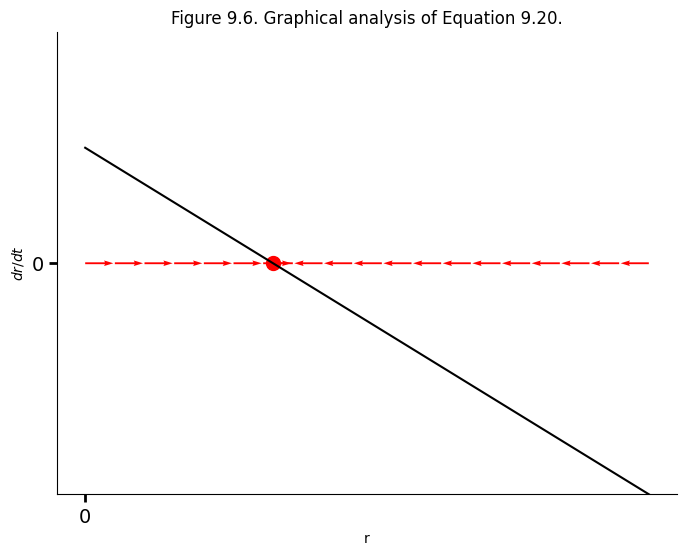

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
kf = 1  # You can set this to the appropriate value
S0 = 1  # You can set this to the appropriate value
kr = 1  # You can set this to the appropriate value
kcat = 1  # You can set this to the appropriate value

# Define the function dr/dt
def dr_dt(r):
    return kf * (1 - r) * S0 - (kr + kcat) * r

# Generate r values
r_values = np.linspace(0, 1, 400)
dr_dt_values = dr_dt(r_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(r_values, dr_dt_values, 'k', linewidth=1.5)
#plt.axhline(0, color='black')

# Mark equilibrium point
r_eq = kf * S0 / (kr + kcat + kf * S0)
plt.scatter([r_eq], [0], color='red', s=100)  # Equilibrium point marker

# Add arrows using quiver
r_quiver = np.linspace(0, 1, 20)
dr_quiver = np.zeros_like(r_quiver)
arrow_direction = np.sign(r_eq - r_quiver)
plt.quiver(r_quiver, dr_quiver, arrow_direction * 0.05, dr_quiver, color='red', scale_units='xy', scale=1, width=0.003)

# Label the axes
plt.xlabel('r')
plt.ylabel('$dr/dt$')
plt.title('Figure 9.6. Graphical analysis of Equation 9.20.')


# Set the y-axis limit to match the provided example
plt.ylim(-2, 2)

# Customize axis properties to match the example
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().tick_params(direction='out', length=6, width=2, colors='black', grid_color='r', grid_alpha=0.5)
plt.gca().tick_params(labelsize=14)

# Remove axis tick label numbers
plt.xticks([0])
plt.yticks([0])

# Display the plot
plt.grid(False)
plt.show()


![Figure 9](https://drive.google.com/uc?export=view&id=1oS-OkcEKNWZn-ZF1MFU3L0tsDLaYoyU9)

> **Figure 9.6. Graphical analysis of Equation 9.20.** Note the vector field and the fixed
point.

The y-intercept is $k_f[S_0]$. The fixed point is shown in Figure 9.6, and because the entire vector field points toward it, the fixed point is stable. The value of the fixed point, req, is calculated at $dr/dt = 0$:

> <h3> $
r_{eq} = \frac{k_f [S_0]}{k_r + k_{cat} + k_f [S_0]}
$

*(Equation 9.21)*


With this solution, it should be easy for you to plot the dynamic response of r to multiple
initial conditions.

To graph the dynamic response of C, remember that $r = [C]/[E_0]$ and therefore $r_{eq} =
[C_{eq}]/[E_0]$, leading to the following equation for $[C_{eq}]$:

> <h3> $
C_{eq} = \frac{k_f [S_0][E_0]}{k_r + k_{cat} + k_f [S_0]}
$

*(Equation 9.22)*


By defining a new quantity, the constant Km, we can simplify Equation 9.21. We define Km as the ratio between the loss and production constants for E in the overall system:

> <h3> $
K_m = \frac{k_r + k_{cat}}{k_f}$

*(Equation 9.23)*

You can think of $K_m$ as indicating the enzyme’s affinity for the substrate. A high $K_m$ means that the dissociation of enzyme and substrate – whether passively $(k_r)$ or through catalysis of a chemical reaction to form product ($k_{cat}$) – is favored over association $(k_f)$. With $K_m$ defined, we can rearrange our expression for [$C_{eq}$]:

> <h3> $
[C_{eq}] = \frac{k_f [S_0][E_0]}{k_r + k_{cat} + k_f [S_0]} \cdot \frac{1/k}{1/k_f} = \frac{[S_0][E_0]}{\frac{k_r + k_{cat}}{k_f} + [S_0]} = \frac{[S_0][E_0]}{K_m + [S_0]}
$

*(Equation 9.24)*

This equilibrium concentration of the complex gives us a basis for the production of product. When the system is at equilibrium, we can substitute [Ceq] into Equation 9.6 to obtain:

> <h3> $
\frac{d[P]}{dt} = k_{cat} [C_{eq}] = \frac{k_{cat} [E_0][S_0]}{K_m + [S_0]} = k_{cat} [E_0] \left(\frac{[S_0]}{K_m + [S_0]}\right)
$

*(Equation 9.25)*


You can mentally partition this equation into two parts: one within parentheses, and one outside. The part within parentheses is a ratio that will always fall between zero and one. If the initial substrate concentration is much smaller than Km, then the ratio will be close to zero and the rate of product production will be very small. On the other hand, if the substrate concentration is much larger than Km, then the ratio is close to one, meaning that the rate is essentially unrestricted by the substrate concentration. At $[S_0] = K_m$, the ratio is equal to 1⁄2, and so the production rate is one-half of what it would be if substrate were plentiful.

You might have deduced from the above paragraph that the maximum rate of product production is equal to the part of Equation 9.24 outside of the parentheses, $k_{cat}E_0$; this quantity is often called the maximum rate, or Vmax, so that Equation 9.25 becomes:

> <h3> $
\frac{d[P]}{dt} = \frac{V_{max} [S_0]}{K_m + [S_0]} = v
$

 *(Equation 9.26)*

 where v is the rate of product formation (you should be saying, “A-ha! A v!” Yes, I’m finally getting back to Figure 9.5). This equation might look familiar, as it’s often called the Michaelis-Menten model of enzyme kinetics.


![Figure 9](https://drive.google.com/uc?export=view&id=1BWqn9MO9DikfOIYyDq_PTq7i7YJ7rrzl)

> **Figure 9.7. Graphical representation of Equation 9.26.** The Michaelis-Menten equation was applied with $V_{max} = 1$ and $K_m = 1$.

A plot of Equation 9.26 appears in Figure 9.7. As we discussed above, at $[S_0] = K_m$, the rate of product formation is one-half of the maximal rate; in other words, $v([S_0] = K_m) = 1⁄2*V_{max}$. Furthermore, at low $[S_0]$, the rate of formation is well represented by simple mass action kinetics – the substrate concentration multiplied by a constant $(V_{max}/K_m)$ – while at high $[S_0]$, the rate approaches the maximum value. This scenario suggests that under some conditions, it might be acceptable to use a constant (high $[S_0]$) or a simple proportionality term (low $[S_0]$) to model the rate of product formation.

## **Section 9.5. Determining kinetic parameters for the Michaelis-Menten system**


Using the Michaelis-Menten framework, we can experimentally determine the parameters $K_m$ and $V_{max}$ for a given enzyme by introducing a known amount of enzyme and substrate and measuring product formation. I want to give you a real-world example of how this determination works, so let’s take a behind-the-scenes look at some data gathered in my lab. We analyzed the following chemical reaction:

> <h3> deoxyuridine + phosphate ion $↔$ deoxyribose-1-phosphate + uracil

which is catalyzed by the enzyme pyrimidine-nucleoside phosphorylase (EC 2.4.2.2). To determine the $K_m$ and $V_{max}$ for this enzyme, and assuming that the concentration of phosphate ion is typically not limiting in the cell, we construct samples with differing concentrations of deoxyuridine in addition to a constant amount of enzyme and the appropriate buffers. After a set period, we stop the reaction (with sodium hydroxide in this case) and measure the amount of uracil via spectrophotometry (uracil can be detected by illumination at A290). Dividing the amount of uracil by the length of time, we obtain $v$, the rate of uracil production. A plot of deoxyuridine concentration vs. $v$ generated in my lab is shown in Figure 9.8. Notice that the shape of these data roughly resembles the Michaelis-Menten curve (it’s real data though, so yes, there are outliers!).


![Figure 9](https://drive.google.com/uc?export=view&id=1gjsdXQi-_qylbCnINi9Y7kg1dp_XKs4y)

> **Figure 9.8. Deoxyuridine concentration versus the rate of uridine production.**
Experimental details appear in the main text. Sanghvi, J. C., Regot, S., Carrasco, S., Karr, J. R., Gutschow, M. V., Bolival, B. Jr., Covert, M. W. Accelerated discovery via a whole-cell model. *Nature Methods*. 2013. **10**(12): 1192-5.

But how do we derive the Michaelis-Menten parameters from these data? You’ve already learned how to perform a linear least squares fit, but in our case we don’t have a line to work with.


Or do we? The classical method for determining $V_{max}$ and $K_m$ was developed by Hanes and Woolf, who formulated a linear representation of the Michaelis-Menten equation. First, they inverted Equation 9.26:

> <h3> $
\frac{1}{v} = \frac{K_m + [S_0]}{V_{max} [S_0]}
$

*(Equation 9.27)*


Next, they multiplied both sides by $[S_0]$, and rearranged the fraction:

> <h3> $
\frac{[S_0]}{v} = \frac{K_m + [S_0]}{V_{max}} = \frac{1}{V_{max}} [S_0] + \frac{K_m}{V_{max}}
$

*(Equation 9.28)*

Notice that Equation 9.28 describes a linear relationship between $[S_0]$ and $[S_0]/v$, plotted for our data as shown in Figure 9.9. Fitting the data to a line, just as we did in Chapter 8, yields the y-intercept and the slope, which give us $K_m/V_{max}$ and $1/V_{max}$, respectively (Figure 9.9A). In our case, the $V_{max}$ turns out to be 0.00437 mM/s, and the $K_m$ is 3.13 mM (you can calculate these values directly from the slope and intercept in Figure 9.9A). Using these numbers, we draw the Michaelis-Menten curve that best describes the original data in Figure 9.8 (Figure 9.9B).

![Figure 9](https://drive.google.com/uc?export=view&id=1WRLg7t0g4EPJY1p5yfCL7SoXWFBKsUR7)

> **Figure 9.9. Determining the parameters for Equation 9.28.** (A) The Hanes- Woolf plot; the points are the averages of the data in Figure 9.8, and a line is fit to them. (B) The parameters from (A) are used to draw the corresponding Michaelis- Menten curve (red). Sanghvi, J. C., Regot, S., Carrasco, S., Karr, J. R., Gutschow, M. V., Bolival, B. Jr., Covert, M. W. Accelerated discovery via a whole-cell model. *Nature Methods.* 2013. **10**(12): 1192-5.

These days, there are newer, non-linear computational regression methods that can obtain more accurate determinations of Km and Vmax, but in many cases the parameter values determined via these methods are indistinguishable from those obtained via the Hanes- Woolf method. Moreover, I want you to see how some mathematical gymnastics enable you to use your linear parameter estimation methods even in the case of a non-linear problem.


## **Section 9.6. Incorporating enzyme inhibitory effects**

The Michaelis-Menten model is based on a number of assumptions that we’ve described, but an additional assumption that we haven’t mentioned bears further investigation. Specifically, this model assumes that the interaction between enzyme and substrate is unregulated, although it is well known that metabolic networks are extensively controlled. For example, in Chapter 7 we discussed regulation at the transcriptional level, using the arginine biosynthesis regulon (Figure 7.16) as an example.

![Figure 9](https://drive.google.com/uc?export=view&id=1EBlLLU8DBm_MggDnkDEkkoblbqZSckj5)

> **Figure 9.10. Strategies for regulating enzyme activity.** (A) Normal interactions between enzyme (circle) and substrate (triangle). The substrate enters the enzyme’s active site (notch in the circle), and catalysis proceeds. (B) Four types of regulation. Inhibitor molecules are depicted in red (inhibitors may have structures similar to that of the substrate or to a conformation of the substrate during catalysis).

There are other ways to regulate enzyme activity at much faster time scales, four of which are shown in Figure 9.10. During substrate inhibition, excess substrate prevents effective enzyme-substrate interaction. In some cases, the presence of an inhibitor molecule binds the enzyme to prevent optimal substrate binding. Direct binding between the inhibitor and the enzyme’s active site is called competitive inhibition. The inhibitor may also act by binding a different part of the enzyme, thereby triggering a structural change in the enzyme that changes the active site, a process known as non-competitive inhibition. A final type of regulation is called uncompetitive inhibition, when the inhibitor binds the enzyme-substrate complex and prevents release of the substrate from the enzyme.

We’ll investigate competitive inhibition here (Figure. 9.11), and I’ll leave it to you to apply these principles to other types of regulation.

![Figure 9](https://drive.google.com/uc?export=view&id=1f-_sqd4za9hCuVrImitZSf58CCuLusA4)

> **Figure 9.11. The set of reactions we’ll use to explore competitive inhibition.** E, enzyme; S, substrate; C, complex; P, product; D, a “dead” complex of enzyme and inhibitor. The forward $(k_f)$, reverse $(k_r)$, catalytic $(k_{cat})$, inhibitory $(k_i)$, and reverse inhibitory $(k-i)$ rate constants are shown.

The ODEs that we’ll use to solve this system are:

> <h3> $
\frac{d[S]}{dt} = k_r [C] - k_f [E][S]
$
> <h3> $
\frac{d[E]}{dt} = k_r [C] + k_{cat} [C] + k_i [D] - k_f [E][S] - k_i [E][I]
$
> <h3> $
\frac{d[C]}{dt} = k_f [E][S] - k_r [C] - k_{cat} [C]
$
> <h3> $
\frac{d[I]}{dt} = k_i [D] - k_i [E][I]
$
> <h3> $
\frac{d[D]}{dt} = k_i [E][I] - k_i [D]
$
> <h3> $
\frac{d[P]}{dt} = k_{cat} [C]
$

*(Equations 9.29-9.34)*


We’ll adopt the same assumptions and use an approach that is very similar to the way we tackled the simpler system without regulation. First, we remember that given the relatively large concentration of $S$, $d[S]/dt$ is roughly equal to zero in comparison to the other processes, and therefore $[S] ≈ [S_0]$. We make an analogous assumption about the concentration of inhibitor I, so that $[I] ≈ [I_0]$. Next, we again assume that the total amount of enzyme does not change over time, so that $[E_0] = [E](t) + [C](t) + [D](t)$. Finally, once again we will focus on equilibrium solutions, where $d[E]/dt = d[C]/dt = d[D]/dt = 0$.


Applying these assumptions leads to a simplified set of equations. Let’s first consider the simplified version of Equation 9.31 for $d[C]/dt$:


> $\frac{d[C]}{dt}\Bigg|_{[c_{eq}][e_{eq}][d_{eq}]} = 0 = k_f \left[ E_{eq} \right] \left[ S_0 \right] - \left(k_r + k_{cat}\right) \left[ C_{eq} \right] $

*(Equation 9.35)*


Solving for $[E_{eq}]$, we obtain:

> $[E_{eq}] = \frac{\left(k_r + k_{cat}\right) \left[ C_{eq} \right]}{k_f \left[ S_0 \right]} = K_m \frac{\left[ C_{eq} \right]}{\left[ S_0 \right]} $

*(Equation 9.36)*


The simplified ODE for $\frac{d[D]}{dt}$ (Equation 9.33) becomes:

> $\frac{d[D]}{dt}\Bigg|_{[c_{eq}][e_{eq}][d_{eq}]} = 0 = k_i \left[ E_{eq} \right] \left[ I_0 \right] - k_{-i} \left[ D_{eq} \right] $

*(Equation 9.37)*



By defining a new constant $K_I = \frac{k_r}{k_f}$ (analogous to $K_m$), we can solve for $[D_{eq}]$:

> $[D_{eq}] = \frac{k_i \left[ E_{eq} \right] \left[ I_0 \right]}{k_{-i}} = \frac{\left[ E_{eq} \right] \left[ I_0 \right]}{K_I} $

*(Equation 9.38)*



Substituting for $[E_{eq}]$ leads to:

$[D_{eq}] = \frac{\left[ I_0 \right] K_m \left[ C_{eq} \right]}{K_I \left[ S_0 \right]} = \frac{K_m \left[ I_0 \right] \left[ C_{eq} \right]}{K_I \left[ S_0 \right]} $

*(Equation 9.39)*



We can then substitute into our total enzyme conservation equation at equilibrium:

> $[E_0] = [C_{eq}] + [E_{eq}] + [D_{eq}]$
>
> $= [C_{eq}] + K_m \frac{\left[ C_{eq} \right]}{\left[ S_0 \right]} + \frac{K_m \left[ I_0 \right] \left[ C_{eq} \right]}{K_I \left[ S_0 \right]} $
>
> $= [C_{eq}] \left( 1 + \frac{K_m}{\left[ S_0 \right]} + \frac{K_m}{K_I} \frac{\left[ I_0 \right]}{\left[ S_0 \right]} \right) $

*(Equations 9.40-42)*



Solving for $[C_{eq}]$, we find:

> $[C_{eq}] = \frac{[E_0]}{1 + \frac{K_m}{\left[ S_0 \right]} + \frac{K_m}{K_I} \frac{\left[ I_0 \right]}{\left[ S_0 \right]} } $
>
> $= \frac{[E_0] \left[ S_0 \right]}{\left[ S_0 \right] + K_m + \frac{K_m}{K_I} \left[ I_0 \right]} $

*(Equations 9.43-44)*



Then $\frac{d[P]}{dt}$ (Equation 9.34) becomes:

> $\frac{d[P]}{dt} = k_{cat} \left[ C_{eq} \right]$
>
> $= k_{cat} \frac{[E_0] \left[ S_0 \right]}{\left[ S_0 \right] + K_m + \frac{K_m}{K_I} \left[ I_0 \right]} $
>
> $= V_{max} \frac{\left[ S_0 \right]}{\left[ S_0 \right] + K_m + \frac{K_m}{K_I} \left[ I_0 \right]} $
>
> $= V_{max} \frac{\left[ S_0 \right]}{\left[ S_0 \right] + K_m \left(1 + \frac{I_0}{K_I}\right)} $

*(Equations 9.45-48)*

So what happened here? What's the difference between Equation 9.48 and the Michaelis- Menten equation (Equation 9.26)? The answer is that $K_m$ in the denominator is now being multiplied by a factor that is greater than or equal to one, depending on the ratio between the concentration of the inhibitor and the inhibitor dissociation constant $K_I$. As shown in Figure 9.12, if the ratio between [$I_0$] and $K_I$ is one, then $K_m$ is multiplied by 2, enough to significantly reduce the rate of product formation if [$S_0$] is comparable to or less than $K_m$. Increasing [$I_0$] relative to $K_I$ further decreases the product formation rate, while a low [$I_0$] relative to $K_I$ makes the system essentially analogous to the Michaelis- Menten system without regulation (Figure 9.7).

![Figure 9](https://drive.google.com/uc?export=view&id=1yZP_KT4sLnIfb6qFtxmxRssEeYLBB4D6)

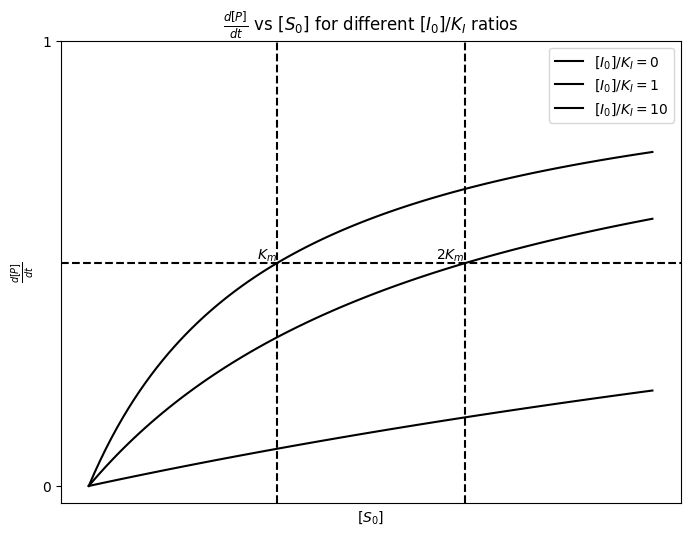

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Vmax = 1.0
Km = 1.0
Ki = 1.0
S0 = np.linspace(0, 3 * Km, 100)

# Function to calculate the rate of product formation
def dP_dt(S0, I0, Ki, Vmax, Km):
    return Vmax * S0 / (S0 + Km * (1 + I0 / Ki))

# Inhibitor concentrations
I0_values = [0, 1, 10]

# Plotting
plt.figure(figsize=(8, 6))
for I0 in I0_values:
    rate = dP_dt(S0, I0, Ki, Vmax, Km)
    plt.plot(S0, rate, label=f'$[I_0]/K_I = {I0}$', color='black')

# Dashed lines and annotations
plt.axhline(y=Vmax/2, color='k', linestyle='--')
plt.axvline(x=Km, color='k', linestyle='--')
plt.axvline(x=2*Km, color='k', linestyle='--')

plt.text(Km, Vmax/2, '$K_m$', verticalalignment='bottom', horizontalalignment='right')
plt.text(2*Km, Vmax/2, '$2K_m$', verticalalignment='bottom', horizontalalignment='right')
plt.xticks([])
plt.yticks([0, 1])

# Labels and legend
plt.xlabel('$[S_0]$')
plt.ylabel(r'$\frac{d[P]}{dt}$')
plt.legend()
plt.title(r'$\frac{d[P]}{dt}$ vs $[S_0]$ for different $[I_0]/K_I$ ratios')

plt.show()


> **Figure 9.12. Competitive inhibition at various values of $[I_0]/K_0$.** The Vmax for all of these values remains the same (eventually all of these curves will approach the top of the y-axis) but the effective $K_m$ increases significantly with an increase in inhibitor, as shown by the dashed lines.

## **Section 9.7. Flux balance analysis**

The Michaelis-Menten approach to modeling enzyme kinetics is now used widely in a
variety of biological systems. It has also been built upon, by adding the framework for

two substrates. Furthermore, larger models generally incorporate multiple Michaelis-
Menten types of systems. However, some scientists have emphasized that in many cases

the approximations required to derive the Michaelis-Menten equation may not always be
valid. In such cases, we simply rely on our Equations 9.3-9.6, which represent the
changes in concentration for S, E, C, and P.
Either way, just as with our transcription and signaling models, a major obstacle and
modeling challenge is to determine the necessary parameter values. Determining the
kinetic parameters for even a single enzyme can be a significant amount of work, and
determining parameters for an entire metabolic network is just plain infeasible with
current technology. This obstacle means that it should be extremely difficult to build
useful larger-scale ODE-based models of metabolism.

However, since the mid-1990s, a new modeling method has greatly expanded the scope
of metabolic models, allowing the creation of models that account for every known
metabolic gene and reaction. This method is called flux balance analysis (FBA), and it
was developed in the laboratory of Bernhard Palsson at the University of California, San
Diego.

The main idea behind FBA is to use linear optimization to get around the need to have
defined kinetic parameters. As an example, let’s consider the very simple metabolic
network in Figure 9.13: a nutrient N is transported into a cell, and converted directly into
biomass (X) being formed and transported out of the cell (think of biomass as
corresponding to new cells). The entire system consists of one metabolic reaction and
two transport reactions.

![Figure 9](https://drive.google.com/uc?export=view&id=10JEjjGZIphieXR9eQC9YrMtrVisxfcF9)

> **Figure 9.13. Our simple metabolic network.** The nutrient $N$ is transported into the cell and converted into biomass ($X$), which is “transported out” as the cell grows and divides. This network is characterized by three metabolic processes, two transport processes and one chemical reaction, which are each associated with flux ($v_{N,in}$, $v_{X,out}$, and $v_{N2X}$, respectively). The $N2X$ notation indicates the conversion of $N$ into $X$.

To model this system using ODEs, we began with:
To model this system using ODEs, we began with:

> <h3> $\frac{d[M]}{dt} = \sum v_{production} - \sum v_{loss}$ </h3>

*(Equation 9.49)*

where [M] is the metabolite and $v$ represents the fluxes that arise when one metabolite is converted to another (as in Figure 9.5 and Equation 9.1, neglecting transport terms in this case). You can see from Equation 9.49 that the units of $v$ are concentration over time; typically concentrations are normalized by the weight of dry cellular biomass in the culture (called the dry cell weight, or DCW) to enable comparisons across time. Thus, in practice the units of $v$ are mmol/g DCW/h.

Note also that the presence of the cellular and extracellular compartments in Figure 9.13 requires us to consider four metabolites, as both N and X can be present inside or outside the cell. For our system, the equations are:

> <h3> $\frac{d[N_{out}]}{dt} = -v_{N,in}$ </h3>
> <h3> $\frac{d[N_{in}]}{dt} = v_{N,in} - v_{N2X}$ </h3>
> <h3> $\frac{d[X_{in}]}{dt} = v_{N2X} - v_{X,out}$ </h3>
> <h3> $\frac{d[X_{out}]}{dt} = v_{X,out}$ </h3>

*(Equations 9.50-9.53)*

Next, we model and parameterize each flux term. For example, we might assume that the fluxes follow Michaelis-Menten kinetics, and write:

> <h3> $\frac{d[N_{in}]}{dt} = \frac{V_{max(N,in)}[N_{out}]}{[N_{out}] + K_{m(N,in)}} - \frac{V_{max(N2X)}[N_{in}]}{[N_{in}] + K_{m(N2X)}}$ </h3>

*(Equation 9.54)*

As you see, we would need to experimentally determine or otherwise specify these four parameters for this equation (six total for the set). In the case of *E. coli*, where more than 1000 metabolic reactions have been identified (Figure 9.4), we would need to determine thousands of parameters – not to mention the additional parameters required for inhibition or other regulation!

FBA takes a different tack. This method begins as before; rates of change in metabolite concentration determined by fluxes (Equation 9.1) are determined and put into matrix notation:

> <h3> $\begin{bmatrix}
\frac{d[N_{out}]}{dt} \\
\frac{d[N_{in}]}{dt} \\
\frac{d[X_{in}]}{dt} \\
\frac{d[X_{out}]}{dt} \\
\end{bmatrix}$
=
$\begin{bmatrix}
-1 & v_{N,in} \\
+1 & -1 & v_{N2X} \\
+1 & -1 & v_{X,out} \\
+1 \\
\end{bmatrix}$

</h3>

*(Equation 9.55)*

where the zero values are represented as empty spaces for clarity. Recall from your linear algebra class that the product of an $m$-by-$n$ matrix and an $n$-by-1 vector is an $m$-by-1 vector.

Equation 9.55 can be represented more compactly as:

> <h3> $\frac{d[M]}{dt} = S v$ </h3>

*(Equation 9.56)*

where $\frac{d[M]}{dt}$ is a vector, S is a two-dimensional matrix, and $v$ is a vector, identical to Equation 9.55. Notice that Equations 9.55-6 are also identical to Equations 9.50-53.

Let’s take a closer look at matrix S in Equation 9.55, considering in turn the rows and the columns:

> $\begin{bmatrix}
v_{N,in} \\
v_{N2X} \\
v_{X,out} \\
\end{bmatrix}
\begin{bmatrix}
N_{out} \\
N_{in} \\
X_{in} \\
X_{out} \\
\end{bmatrix}$

The rows each correspond to a particular metabolite, and you’ve already seen how the entries correspond to the production and loss terms for that metabolite’s ODE.

Each column corresponds to a reaction, and the entries in that column are the stoichiometric coefficients for that reaction. For example, look at the left column, which is linked to the reaction that transports N into the cell. Note that the top entry is in the $N_{out}$ row and its value is -1, while the next entry down is in the $N_{in}$ row, with a value of +1. A negative sign corresponds to metabolites that are used (substrates), while the positive signs indicate a reaction product. Accordingly, from the left column we can write:

> <h3> $\begin{bmatrix}
[1]N_{out} \\
\end{bmatrix}
\xrightarrow{-v_{N,in}}
\begin{bmatrix}
[1]N_{in} \\
\end{bmatrix}$
</h3>

*(Equation 9.57)*

This is the reaction itself! So rather than working out all of the conservation relationships to build the matrix S in terms of its rows, you can write matrix S more simply as a group of reaction stoichiometries. For this reason, we often call matrix S the stoichiometric matrix.

Note that matrix S is invariant with respect to a particular organism because the stoichiometry of reactions does not change; one glucose molecule has exactly six carbon atoms, and so at most one fructose molecule (six carbons) could be produced through glycolysis. The invariance of matrix S is markedly different from the other kinetic parameters we’ve discussed, the determination of which can vary widely, depending on the experimental conditions and strategy, as well as on the laboratory – or even the individual – performing the assay. However, as long as the genome (and consequently, the metabolic network of the cell) remains the same, matrix S will be constant. This scenario has some major advantages for large-scale modeling, which is why the re-arrangement of the set of ODEs to obtain matrix S is one of the best features of FBA.


## **Section 9.8. Steady-state assumption; exchange fluxes**

Now we have one completely specified matrix and two unknown vectors. To simplify
the problem, Palsson and colleagues decided to focus on the steady-state solutions. This
strategy seemed justified, as most research in the field of metabolic engineering was
concerned with observations over the hours or days that it takes cells to divide, as
opposed to the time scales required for a metabolic reaction to occur (typically on the
order of seconds). Concentrating on the longer time scales is akin to stating that $d[M]/dt ≈ 0$, and therefore:

> <h3> Sv = 0

*(Equation 9.58)*


Obtaining this small equation was a huge result, because decades of research had already gone into solving this problem (a known matrix multiplied by a vector of unknowns equals a zero vector) using linear optimization. Airlines, oil companies, and shipping companies decide how to route their fleet based on variations of Equation 9.58, and major financial investment companies use it too.

However, there are certain problems with the steady-state assumption: for example, what do we do about chemical species outside of the cell? Consider *E. coli* growing and taking up glucose, for example, or even the simplified example in Figure 9.13. In this case, the rate of change of the glucose concentration in the outside environment must be non-zero, so $d[M]/dt$ for that row would have a non-zero value.

Palsson and colleagues addressed this issue by introducing the concept of an **exchange flux.** Figure 9.14 adds two exchange fluxes to our simple network from Figure 9.13. Exchange fluxes, denoted by convention with the letter ‘b,’ appear to be fluxes to nowhere. They are missing substrates or products because they allow metabolites to enter or exit the system.

![Figure 9](https://drive.google.com/uc?export=view&id=1N22om_j4_srQobQZySJEnScDTz-Da53u)

> Figure 9.14. Adding exchange fluxes to the simple network in Figure
9.13.** $N_{out}$ and $X_{out}$ are present outside of the cell, and their concentrations
change over time (picture a cell feeding on a nutrient and creating biomass).
The exchange fluxes enable $N_{out}$ and $X_{out}$ to enter or leave the system,
respectively. By convention, exchange fluxes are labeled with a $b$ instead of
the $v$ used for most fluxes.

Using the exchange flux convention, if $d[M]/d$ for a certain metabolite outside of the cell had a non-zero value, then we would not be able to use Equation 9.58. Instead, let’s go back to Equation 9.49, which as you remember is a statement of the mass balance for each metabolite. If we say that d[M]/dt is equal to a value b, then:

> <h3> $b = \sum v_{production} - \sum v_{loss}$ </h3>

*(Equation 9.59)*

Rearranging,

><h3> $0 = \sum v_{production} - \sum v_{loss} - b$ </h3>

*(Equation 9.60)*

We can apply Equation 9.60 to Figure 9.14 by writing the full set of conservation equations:

><h3> $\frac{d[N_{out}]}{dt}: 0 = -v_{N,in} + b_N$ </h3>

*(Equation 9.61)*

><h3> $\frac{d[N_{in}]}{dt}: 0 = v_{N,in} - v_{N2X}$ </h3>

*(Equation 9.62)*

><h3> $\frac{d[X_{in}]}{dt}: 0 = v_{N2X} - v_{X,out}$ </h3>

*(Equation 9.63)*

><h3> $\frac{d[X_{out}]}{dt}: 0 = v_{X,out} - b_X$ </h3>

*(Equation 9.64)*

Writing these equations in matrix notation yields a new S matrix and $v$ vector:

> <h3> $\begin{bmatrix}
\frac{d[N_{out}]}{dt} \\
\frac{d[N_{in}]}{dt} \\
\frac{d[X_{in}]}{dt} \\
\frac{d[X_{out}]}{dt} \\
\end{bmatrix}$
=
$\begin{bmatrix}
-1 & v_{N,in} & +1 \\
+1 & -1 & v_{N2X} \\
+1 & -1 & v_{X,out} \\
+1 & -1 & \\
\end{bmatrix}$
$\begin{bmatrix}
v_{N,in} \\
v_{N2X} \\
v_{X,out} \\
b_N \\
b_X \\
\end{bmatrix}$ </h3>

*(Equation 9.65)*

or

> <h3> $0 = S_b * v_b$ </h3>

*(Equation 9.65)*

In other words, the above equation is an equivalent way of writing the conservation relationship with the metabolite concentrations such that the left side of the equation is zero.


## <u> **Practice Problem 9.2** </u>

*Give the stoichiometric matrix for the system shown in Figure 9.15. Label the matrix rows and columns.*

![Figure 9](https://drive.google.com/uc?export=view&id=1NZDgh9bRdPGrSnls2LzsXu7aIt3llYgA)

> **Figure 9.15. The network for Practice Problem 9.2.**

**Solution:** The matrix is:

$\begin{array}{c|ccccccc}
& v1 & v2 & v3 & v4 & b1 & b2 & b3 \\
\hline
A & -1 & -1 & & & +1 & & \\
B & +1 & & -1 & & & & & \\
C & & +1 & -1 & -1 & & & \\
D & & & +1 & & & -1 & & & \\
E & & & & +2 & & & -1 \\
\end{array}$ </h3>

Notice that the entries don’t have to simply be +1, -1, or zero. They don’t even have to be integers, as you’ll see later.

## **Section 9.9. Solution spaces**

In linear algebra, the solution to an equation with the form of Equation 9.64 is called the **null space** of $S_b$ (FBA terminology calls this space the “solution” space). The operable
word here is “space,” illustrated in Figure 9.16A. Usually the system is **underdetermined**, meaning that there are many possible solutions to the equations. Assuming that all of the fluxes in our sample system can only take on positive values, the positive orthant (grey) in Figure 9.16 holds all possible combinations of flux values that can be attained by the system, both dynamic and at steady state. The null space of $S_b$ is shown in black (but only schematically, for illustrative purposes; in reality, the **solution
space** is just the straight line $v_{N,in} = v_{N2X} = v_{X,out}$). This space holds all of the solutions for which $d[M]/dt = 0$. A particular ODE solution, based on determination of the necessary
parameter values as well as an initial condition, will follow a trajectory. In the case illustrated in Figure 9.16B, the trajectory begins at the origin and then travels outside of the FBA solution space until the system reaches a steady state, which necessarily falls inside the solution space.

![Figure 9](https://drive.google.com/uc?export=view&id=1ywEniX3OGc7Om-oHfi5BeKBKF_cFnag_)

> **Figure 9.16. Schematic example of the solutions to Equation 9.65 produced by FBA (black) or by solving a set of ODEs (red).** FBA yields a solution space that contains all of the possible steady-state solutions. The ODE solution contains a single
trajectory over time that may eventually reach a steady state. The flux terms are as described in Figure 9.14. The exchange flux axes are not shown to keep this figure two-dimensional.

## **Section 9.10. The objective function**

As I mentioned in Section 9.8, this mathematical approach is used by major companies,
and financial analysts and logistics consultants also calculate solution spaces to describe
their problems. However, these people are not interested in the entire space. Instead –
this is going to shock you – they are interested in making money. They want to identify
the solutions in the space that maximize profits or minimize costs. To identify these
**optimal solutions**, they define an **objective.** With a bounded solution space and an
objective, they can use linear optimization to find their solutions.

We could also apply linear optimization to identify points in the metabolic solution space.
But do cells have actually objectives? It sounds more than a little anthropomorphic, and
indeed was a hotly contested assumption when it was first published, but FBA relies on
the assumption that the cellular metabolic network can be treated as if it has an objective.
Consider an E. coli culture growing in a test tube on your bench. This culture comes
from a single cell, but it’s not uniform. Many mutations have occurred during culture,
and some of these mutations could enable one cell to grow a little faster than its
neighbors. Let’s assume that some cells arise grow ~10% faster than the rest of the cells
in the culture. If those faster-growing cells initially only represent 1% of the total
population, they’ll take over the entire population in less than one day (Figure 9.17).

![Figure 9](https://drive.google.com/uc?export=view&id=1ZqAypSsCclBVW6kMdqk96d7KQ0t19qnU)

> **Figure 9.17. The population fraction of a group of cells that divides faster (growth rate 0.4 divisions/h) than the rest of the population (growth rate 0.36 divisions/h).** This group goes from making up 1% of the population to nearly 100% in less that a day. This graph is based on a theoretical estimation, solving the growth
equation $X = X_0e^{μt}$ for both populations.

In other words, the fastest-growing cells are highly favored in the lab environment, and
so under those conditions we might be able to treat them as if they had an “objective” to
maximize the amount of biomass they produce. This is the most common objective
invoked in FBA.

Can we make this assumption for all kinds of cells? No. An objective of maximizing
growth would be totally inappropriate when modeling the metabolic network of a neuron,
for example. However, this assumption would be relevant to the growth of a tumor cell,
which is characterized by unrestrained growth.

How do we mathematically represent such an objective? Scientists have measured the chemical composition of certain cells, including *E. coli*, from which we can determine the biomass maximization objective. For example, if we know that *E. coli* is 70% water and
that the remaining dry *E. coli* biomass consists of 55% protein, 20.5% RNA, 3.1% DNA, 9.1% lipid, 3.4% lipopolysaccharide, 2.5% murein, 2.5% glycogen, and 3.9% polyamines, metabolites, cofactors, and ions (by weight), then we know that the metabolic network needs to produce these biomass components in these amounts to make cells. Several of these components can be specified further; for example, 1 g of *E. coli* dry weight (a common unit of measure) contains 0.205 g RNA, which has 165 μmol AMP, 203 μmol GMP, 126 μmol CMP, and 136 μmol UMP.

Using these numbers, we can devise a pseudo-chemical reaction that describes biomass formation. Analogous to the way in which we represent the conversion of PEP and ADP to pyruvate and ATP with the equation PEP + ADP → pyruvate + ATP, we can also write:

> <h3> $\sum \text{Protein subunits} + \sum \text{RNA subunits} + \sum \text{DNA subunits} + \ldots \xrightarrow{v_{biomass}} 1 \text{g dry biomass}$ </h3>

*(Equation 9.66)*

We can even unpack the summations to read, for example:

> <h3> $\sum \text{Protein subunits} + (165 \mu mol \text{AMP} + 203 \mu mol \text{GMP} + 126 \mu mol \text{CMP} + 136 \mu mol \text{UMP}) + \sum \text{DNA subunits} + \ldots \xrightarrow{v_{biomass}} 1 \text{g dry biomass}$ </h3>

*(Equation 9.67)*


The full equation will include dozens of subunits, with coefficients determined from the scientific literature (see Recommended Reading).

Notice that Equation 9.67 is essentially conversion of molecular concentrations to DCW.
This conversion results in a change in the units of the biomass flux: whereas typical
fluxes have units of mmol/g DCW/h, the biomass flux has units of 1/h. In fact, you know
another name for this flux: the growth rate.

## **Section 9.11. Defining the optimization problem**

With an objective function defined, we can express the linear optimization problem in
terms of that function and a set of constraints that define the solution space:

*Maximize (or minimize):*

*Subject to these constraints:*



Applied to our case, so far we have:

*Maximize:* $v_{biomass}$

*Subject to these constraints:* $S_bv_b = 0$

*(Equation 9.65, conservation of mass)*



This is a good start, but the solution space could be reduced even more, giving us a
tighter lock on our answer, if we could come up with other constraints. FBA typically
incorporates two other types of constraints, the first of which concerns the reversibility of
chemical reactions. Some of the reactions in a metabolic network can go in either
direction (paired arrows in Figure 9.11), while others can only proceed in one direction
(single arrow in Figure 9.11), usually due to the energetics or to the enzymes required for
the reaction. In our current definition of the problem, the flux values for all of the
reactions (vi) are unconstrained, so:

> <h3> $ -∞ ≤ v_i ≤ +∞$

*(Equation 9.68)*

However, when a given reaction is known to be irreversible, we can write the constraint
as:

> <h3> $ 0 ≤ v_i ≤ +∞$

*(Equation 9.69)*

Adding these reactions generally collapses the solution space through several dimensions,
but there’s another type of constraint that can reduce it even more. Consider the fact that
no real enzyme can actually produce a flux value of infinity. Instead, each enzyme has a
maximum capacity, and if we knew that capacity, we could add in that constraint:

> <h3> $ -v_{max} ≤ v_k ≤ v_{max}$

*(Equation 9.70)*

Measuring vmax is difficult; as you’ve seen, in most cases we would need to determine kcat
for that enzyme as well as the amount of enzyme itself. In general, we only look at
certain key transporters to consider how much nutrient the cells take up from the
environment and how much product they secrete. We use those numbers to establish our
constraints, so now we have:

*Maximize:* $v_{biomass}$

*Subject to these constraints:*
* $S_bv_b = 0$ (conservation of mass)
* $0 ≤ vj ≤ +∞$ (irreversibility)
* $-v_{max} ≤ v_k ≤ +v_{max}$ (maximum capacity)

## **Section 9.12. Solving FBA problems using Python**

All of these constraints can be encoded in Python using the function `linprog` from the `scipy.optimize` module. The function looks like this:

```python
from scipy.optimize import linprog

result = linprog(c=obj_fxn, A_eq=S, b_eq=zero_vals, bounds=list(zip(lower_bounds, upper_bounds)))
v_vals = result.x
obj_val = result.fun
```

where `v_vals` is the set of all of the fluxes, `obj_val` is the value of the flux for the objective function only, `obj_fxn` is a vector that contains the objective function (it’s written as a reaction column vector, so normally we implement this by adding an exchange flux for the biomass to exit the system, and then maximizing that flux; note that `linprog` always minimizes the objective function, so to maximize it, multiply `obj_fxn` by `-1`), `S` is the stoichiometric matrix `Sb`, `zero_vals` is a vector of zeros (the right side of `Sb*v_b=0`), and `lower_bounds` and `upper_bounds` are vectors that define the low and high bound, respectively, for each flux.

Tip: one issue with `linprog` is that it doesn’t work well for real-world problems, so if you’re planning on adding FBA to your research tool kit, you’ll want to consider better solvers, such as `glpk`, which can be integrated with Python. Since `glpk` can be tedious to install, `linprog` will be sufficient for learning and practice.

Let’s put this all together with a real-world example. Let’s say that you wanted to build a
metabolic model for *E. coli* (the Palsson lab has actually built, tested, updated, and
distributed such a model for almost two decades now; see Orth et al. in the Recommended Reading). How would you start?

The first step would be to determine the metabolic genes in *E. coli.* This “parts list” for the network can be obtained from the annotated genome sequence. For example, a table of protein functions can be obtained from the Marine Biological Laboratory (genprotec.mbl.edu/files/geneproductfunctions.txt). I’ve listed the first five entries in Table 9.1. The first three columns (eck, bnum, and genbank) contain three different types of gene ID. The next column is the gene name, followed by the gene type. Notice that the first four genes are the thr operon, with the leader thrL followed by the enzyme-encoding genes thrA, thrB, and thrC. The functions of these genes are presented in the next column, “gene type.” The final columns provide the names of the gene product and
the EC numbers if applicable. Notice that thrA is a fused enzyme that can catalyze two reactions, and hence it has two EC numbers.

![Figure 9](https://drive.google.com/uc?export=view&id=1GiLb6A1LZjnNRg326rfQNLPidiouqaTz)

> **Figure 9.18. A screenshot from Ecocyc that illustrates the metabolic pathway for threonine biosynthesis in *E. coli.*** Note that the enzymes, gene names, reactants, products, and EC numbers can all be identified, and the relationships between reactions
are depicted. Used with permission from EcoCyc.

## <u> **Practice Problem 9.3** </u>

*(a) Using Figure 9.18, write out an S matrix for the threonine biosynthesis pathway, beginning with L-homoserine. Ignore the exchange fluxes for now.*

**Solution to (a):** The S matrix is:

$$
\begin{array}{lcc}
    & v_{\text{thrB}} & v_{\text{thrC}} \\
\text{L-homoserine} & -1 & \\
\text{ATP} & -1 & \\
\text{ADP} & +1 & \\
\text{H}^+ & +2 & \\
\text{O-phospho-L-homoserine} & +1 & -1 \\
\text{H}_2\text{O} & & -1 \\
\text{Phosphate} & & +1 \\
\text{L-threonine} & & +1 \\
\end{array}
$$


There are two reactions, one of which converts L-homoserine to O-phospho-L-
homoserine and another that has L-threonine as the product. Building the S matrix requires including the stoichiometric coefficients for all reactants and products in each
reaction. Notice that reversibility does not come into play when building the S matrix; that information is encoded in the constraints, as demonstrated next.

*(b) Set up a linear optimization problem to determine the amount of L-threonine that can be produced from an input feed for L-homoserine of 10 molecules/h. Assume that all required factors are available in the medium except for O-phospho-L-homoserine, and write all of the exchange fluxes with positive coefficients in the S matrix. How would you code this in Python?*

**Solution to (b):** Here, we define an $S_b$ matrix, with all of the exchange fluxes included, and a vector $v_b$.


$
\begin{array}{c|ccccccccc}
  & v_{thrB} & v_{thrC} & b_{hms} & b_{ATP} & b_{ADP} & b_{H^+} & b_{phs} & b_{H_2O} & b_{phos} & b_{thr} \\
\hline
hms & -1 &  & +1 &  &  &  &  &  &  &  \\
ATP & -1 &  &  & +1 &  &  &  &  &  &  \\
ADP & +1 &  &  &  & +1 &  &  &  &  &  \\
H^+ & +2 &  &  &  &  & +1 &  &  &  &  \\
phs & +1 & -1 &  &  &  &  & +1 &  &  &  \\
H_2O &  & -1 &  &  &  &  &  & +1 &  &  \\
phos &  &  &  &  &  &  &  &  & +1 &  \\
thr &  & +1 &  &  &  &  &  &  &  & +1 \\
\end{array}
= S_b
$


where *hms* stands for L-homoserine, *phs* refers to O-phospho-L-homoserine, *phos* is the phosphate ion, and *thr* represents L-threonine, the end product.

$
\begin{array}{c}
  v_{thrB} \\
  v_{thrC} \\
  b_{hms} \\
  b_{ATP} \\
  b_{ADP} \\
  b_{H^+} \\
  b_{phs} \\
  b_{H_2O} \\
  b_{phos} \\
  b_{thr} \\
\end{array}
= v_b
$

With $S_b$ and $v_b$ defined, we can write the problem as follows:

Maximize $-b_{thr}$ (use a negative sign because we want to capture the threonine leaving the system)
Subject to  

$S_b v_b = 0$  
$0 \le v_{thrC} \le +\infty$  
$0 \le b_{hms} \le 10$  
$0 \le b_{phs} \le 0$  

The units are molecules/h.






```
# Import necessary libraries
import numpy as np
from scipy.optimize import linprog

# Define the S matrix
S = np.array([
    [-1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
    [-1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
    [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
    [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0],
    [ 1, -1,  0,  0,  0,  0,  1,  0,  0,  0],
    [-1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
    [ 0,  1,  0,  0,  0,  0,  0,  0,  1,  0],
    [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1]
])

# Define zero_vals
zero_vals = np.zeros((8, 1))

# Define lower_bounds
lower_bounds = np.ones((10, 1)) * -np.inf
lower_bounds[1] = 0  # vthrC
lower_bounds[2] = 0  # bhms
lower_bounds[6] = 0  # bphs

# Define upper_bounds
upper_bounds = np.ones((10, 1)) * np.inf
upper_bounds[2] = 10  # bhms
upper_bounds[6] = 0   # bphs

# Define the objective function
obj_fxn = np.zeros((10, 1))
obj_fxn[9] = 1  # bthr

# Run linprog to solve the linear programming problem
res = linprog(c=obj_fxn.flatten(), A_eq=S, b_eq=zero_vals.flatten(),
              bounds=np.hstack((lower_bounds, upper_bounds)))

v_vals = res.x
obj_val = res.fun

print("v_vals =", v_vals)
print("obj_val =", obj_val)

```



## **9.13. Applications of FBA to large-scale metabolic models**

By organizing reactions into pathways and building pathways into networks, Palsson’s
team constructed metabolic models of E. coli that became increasingly comprehensive.
Their latest model (see Orth et al. in Recommended Reading) accounts for 1366 genes,
2251 metabolic reactions, and 1136 unique metabolites.

A model like this can be incredibly powerful, and I’d like to walk you through a few
examples. First, similar to what we just did – but on a grander scale – it is possible to
predict how much biomass is produced, and what byproducts result, when E. coli grows in a defined environment. For example, Edwards and Palsson used the first large E. coli
model (accounting for 600 genes) to determine how the cell used glucose to produce
biomass. Figure 9.19A depicts the most central part of the network they reconstructed,
which includes glycolysis, the pentose phosphate pathway (PPP), and the TCA cycle.

Figure 9.19B shows the distribution of fluxes when 6.6 millimoles of glucose per gram of
dry cell weight per hour are available to the cells. Notice how some of the flux goes
through the PPP and some goes through the TCA cycle. Also notice how the flux seems
to double after glyceraldehyde-3-phosphate because the six-carbon sugar fructose 1,6 -
diphosphate is split into two three-carbon sugars. Not all of these numbers add up in the
figure in the way you would expect; you have to remember that Edwards and Palsson
modeled hundreds more reactions than appear here, and some of those reactions pull off
flux.

The power of FBA really shines through in Figure 9.19C, where the entry to the PPP
from glucose-6-phosphate was (virtually) knocked out. As a result, the PPP runs in the
opposite direction, produces more acetate, and has more flux diverted through the TCA
cycle.

![Figure 9](https://drive.google.com/uc?export=view&id=1xehvUj7XHxLX70poo7zu52p9bC8MdT8u)

> **Figure 9.19. Modeling flux using FBA.** Glycolysis, the PPP, and the TCA cycle
pathways are shown in (A); the arrows represent chemical reactions and the text
indicates small molecules. (B) FBA calculation of the flux values in wild-type *E. coli.* Numbers on arrows indicate the fluxes through those pathways. (C) A zwf-
strain in which one of the entry steps to the PPP is knocked out (indicated by the red X), changing the overall flux distribution. Negative numbers indicate that the
flux moves in the direction opposite the arrow. Modified from Edwards, J. S.,
Palsson, B. Ø. The Escherichia coli MG1655 in silico metabolic genotype: its
definition, characteristics, and capabilities. Proceedings of the National Academy
of Sciences of the United States of America. 2000. 97(10):5528-33. Copyright
(2000) National Academy of Sciences, U. S. A.

How would you model these knockouts using FBA? The answer turns out to be
extremely simple: for the flux for gene X, vgeneX, just add constraints to the upper and
lower bounds such that 0 ≤ vgeneX ≤ 0. Note that knocking out gene X leads to a constraint
on protein X. Adding a basic for-loop to this approach would generate the metabolic
flux distributions for all single-gene knockouts in a matter of minutes. Two for-loops
would get you all of the double-gene knockouts (which hasn’t yet been done
experimentally). Add a third for-loop and you can test all of the double knockouts in a
variety of environmental conditions. The possibilities are mind-boggling! And it doesn’t
just have to be knockouts; you can constrain vgeneX to non-zero values or ranges. For
example, you could reduce the flux for vgeneX by 90% from the wildtype, similar to an
siRNA knockdown. You can also increase the flux from the wild-type value to model the
effects of overexpression of gene X.

How well does the E. coli FBA model compare to experimental data? The first major
comparisons were made by growing E. coli on various minimal media, using the
measured uptake rates for the carbon source and oxygen as capacity constraints on the
FBA model, and comparing the resulting growth-rate prediction with the experimental
measurements. This model (see Edwards et al. 2001 in Recommended Reading) did very
well for certain substrates, such as acetate, succinate, and malate, predicting growth rates
that agreed well with experimental measurements.

In other cases, most notably glycerol, the predicted growth rate was much higher than the
measured growth rate. Palsson’s team hypothesized that if E. coli evolved in the glycerol
environment, the growth rate would increase and eventually stabilize at the predicted rate.
Remarkably, this hypothesis proved to be correct (see Ibarra et al. in Recommended
Reading), one of the most dramatic demonstrations of FBA’s ability to predict growth
phenotypes.

More commonly, FBA models are used to predict qualitatively whether a given knockout
strain of E. coli can grow in a given environment. Perhaps not surprisingly, the model
performs best with environments that are well studied. The most recent E. coli model correctly predicted the essentiality of a given gene in glucose or glycerol minimal
medium ~90% of the time (see Orth et al. in Recommended Reading). With less familiar
environments, the model is less accurate: one study of 110 environments and 125
knockout strains yielded ~65% agreement (see Covert et al. in Recommended Reading).
Nevertheless, these numbers underscore the utility of FBA in predicting growth
phenotypes from a small number of measured parameters.

## **9.14. Using FBA for metabolic engineering**

Some of the most exciting FBA-related work involves the engineering of new E. coli
strains to make products that had never been made with a biological system. My current
favorite of these investigations came from South Korea, where Sang Yup Lee and his
colleagues at the Korea Advanced Institute of Science and Technology succeeded in
producing the valuable polymer polylactic acid (PLA) directly in cells for the first time
(see Jung et al. and Yang et al. in Recommended Reading). Among its desirable
properties, PLA has very low toxicity to humans and is biodegradable, rendering it useful
in medical implants (such as screws or scaffolds).

However, PLA production depends on a difficult and expensive two-step synthesis
process, so Lee and his team set out to determine whether the entire process could be
performed in one step in E. coli. Their effort involved challenges in engineering specific
proteins, pathways, and networks, so it’s a terrific example of metabolic engineering at its
finest.

They began with the E. coli network with which you are already familiar (Figure 9.20A).
Lee and colleagues were particularly interested in lactic acid production, so I’ve added
the chemical reaction that produces lactic acid from pyruvate (catalyzed by lactate
dehydrogenase) to Figure 9.20A.

PLA had never been produced biologically, and no enzymes existed for catalyzing the
necessary reactions, so Lee and team had to create new enzymes; they therefore
implemented protein-engineering strategies that I can only briefly summarize here. First,
they noted that another class of polymers, the polyhydroxyalkanoates, could be
synthesized in cells. By introducing several random mutations into the sequences of key
genes in the lactic-acid pathway, they modified two enzymes such that the pathway
would accept lactate as a substrate. They introduced the pathway into E. coli: four
enzymes total, two of which were optimized (Figure 9.20B).

![Figure 9](https://drive.google.com/uc?export=view&id=1REpSsnye3C3CcTv9DUbvFui3No7_wq6W)

> **Figure 9.20. Harnessing E. coli’s endogenous network to generate an “unnatural” product.** (A) The glycolytic pathway in E. coli, including lactic acid synthesis. (B) Adding
four new enzymes to the circuit that use lactate as a substrate. (C) Increasing PLA yield via
metabolic engineering. The enzymes encoded by ackA and ppc were removed from the
pathway (dashed lines), and ldhA received a stronger promoter (heavy line), thereby increasing
the amount of enzyme produced and consequently, the flux. Modified with permission from
Jung, K. Y., Kim, T. Y., Park, S. J., Lee, S. Y. Metabolic engineering of Escherichia coli for
the production of polylactic acid and its copolymers. Biotechnology and Bioengineering. 2010.
105(1):161-71. Copyright © 2009 Wiley Periodicals, Inc.

Although the resulting strain of E. coli did produce PLA, it was only a trickle, not nearly
the yield needed for economically feasible biological production of PLA. The problem
was the trade-off between cellular growth and PLA production; carbon diverted to PLA
production cannot be integrated into the necessary biomass components. Moreover,
overall yield depends not only on how much PLA each cell can make, but on how many
cells are producing it.

Lee’s team therefore tried to engineer the organism to increase PLA yield without unduly
hindering cell growth. A metabolic engineer typically has two options in this regard: (1)
reduce or eliminate the expression of unnecessary genes, or (2) introduce or increase the
expression of important genes. Lee’s team tried both strategies, with the goal of pushing
all possible resources to pyruvate and lactate. They removed the gene encoding an
enzyme that produces acetate from acetyl-CoA (ackA), as well as another gene encoding
the PEP-carboxylase (ppc), which allows flux to bypass pyruvate entirely on its way to the TCA cycle (Figure 9.19C). They also introduced a stronger promoter to increase the
flux from pyruvate to lactate (encoded by the lactate dehydrogenase gene, ldhA).

The new strain made quite a bit more PLA, but the authors wanted to obtain the greatest
possible yield. Their problem was, where do we go from here? There were several
options, and they had already made the most obvious modifications. As a result, they
turned to FBA to help them design a new strain in silico.

As we’ve already discussed, it is quite simple to constrain fluxes in FBA, making them
higher or lower. Lee’s team started with an E. coli S matrix, added columns for the
metabolic reactions that they had introduced into their strain, and began the design
process by considering gene knockouts. They performed simulations in which the PLA
synthesis genes were added, and they knocked out each of the genes in the entire
metabolic network in turn by setting the upper and lower bounds for the corresponding
fluxes to zero. These simulations indicated the resulting growth rate and PLA production
rate. Many of the knockouts simply made growth impossible, and many others had no
impact on growth or on PLA yield. However, knocking out a handful of genes reduced
the growth rate and increased PLA production (9.21A). The most interesting of these genes (adhE) encodes the alchohol dehydrogenase that produces ethanol as part of a two-
step pathway starting with acetyl-CoA (shown as a single arrow in Figure 9.21B). The adhE knockout was predicted to significantly increase PLA production with only a minor
drop in cellular growth rate.

![Figure 9](https://drive.google.com/uc?export=view&id=1Q_vKzxuBk042XbbqCYXbMtUbAuai1CVL)

> **Figure 9.21. Simulations reveal a strategy for increasing PLA yield without
sacrificing growth rate.** (A) Lee and colleagues used simulations to test the results of
gene knockouts on PLA production rate and growth rate in silico. Knockout of adhE was
predicted the boost PLA production without a substantial loss in growth rate. (B) The
protein encoded by adhE participates in the ethanol biosynthesis pathway, which is
collapsed to a single arrow here. Modified with permission from Jung, K. Y., Kim, T. Y.,
Park, S. J., Lee, S. Y. Metabolic engineering of Escherichia coli for the production of
polylactic acid and its copolymers. Biotechnology and Bioengineering. 2010.
105(1):161-71. Copyright © 2009 Wiley Periodicals, Inc.

Next, Lee and colleagues used FBA to identify the best candidate genes for
overexpression. Once again, there was a tradeoff between how fast a cell can grow and
the amount of a byproduct it can produce, because both biomass and byproduct require
glucose’s carbon and energy. Lee and colleagues used FBA to specify this tradeoff
(Figure 9.22A) by setting the growth rate (both upper and lower bounds) to a specific
value (plotted on the x-axis in Figure 9.22A). The objective function was then defined as
the maximization of PLA production (plotted on the y-axis in Figure 9.22A).

The top plot of Figure 9.22A depicts the FBA-calculated tradeoff for the wild-type strain.
As we would expect, a higher growth rate leads to lower PLA production, and vice versa.
However, in the right portion of the top plot, a relatively large increase in PLA
production results from a relatively small decrease in growth rate. How does gene
overexpression affect this tradeoff?

Lee and colleagues found that overexpression of different genes could have significantly
different impacts on the tradeoff curve. For example, increasing the flux through the PPP
in FBA (by overexpressing any of the PPP genes) shifts the tradeoff down and to the left,
leading to both lower growth rates and lower PLA yield (Figure 9.22A, second from top).
This result should make intuitive sense to you, because drawing flux into the PPP leaves
less flux available to lactate and the TCA cycle, from which the protein is produced (a
key requirement for biomass production). This was the least desirable outcome, and so
the PPP genes were not considered further.

Overexpressing the genes in the TCA cycle pulls the flux past lactate (Figure 9.22A, third
from top), generating more cell growth – but at the cost of PLA production.
Interestingly, overexpression of the flux through glycolysis actually led to increased
growth as well as increased PLA production (Figure 9.22A, second from bottom). Here,
the team was limited by engineering concerns; the E. coli glycolytic pathway is so tightly
regulated that they probably would have had to reconstitute the entire pathway with new
regulation, and even then there would likely have been many problems. They therefore
left the glycolytic pathway alone.

Finally, the team identified a single flux whose overexpression shifted the curve
significantly for PLA production, with an acceptable decrease in growth rate (Figure
9.22A, bottom). The corresponding gene (acs) encodes acetyl-CoA synthase, which uses
acetate as a substrate. They decided to overexpress acs in the final strain.

I have to admit that when I first read this paper, even as an expert in *E. coli* metabolism, I
was quite surprised. What was going on with acs? The result seemed counterintuitive.
What I had missed was that acetate was being produced as a by-product of the PLA biosynthesis pathway they had introduced. Overexpressing acs enabled the cell to re-
capture that carbon and push it toward growth (Figure 9.22B).

![Figure 9](https://drive.google.com/uc?export=view&id=1UGfudecOGzfV4IbqSBlrabJXuBMtDDMo)

> **Figure 9.22. Examining the effect of gene overexpression on PLA production.** (A)
Using FBA to shift the bounds of the fluxes and examine the effect on PLA yield. The
dashed line depicts the shift in growth versus PLA production when the flux is changed in
FBA. (B) Overexpressing acs allows the cells to recapture the carbon lost through acetate
production. (C) Transmission electron microscopy revealed that the E. coli cells harbored
large accumulations of PLA (white circles). Modified with permission from Jung, K. Y.,
Kim, T. Y., Park, S. J., Lee, S. Y. Metabolic engineering of Escherichia coli for the
production of polylactic acid and its copolymers. Biotechnology and Bioengineering. 2010. 105(1):161-71. Copyright © 2009 Wiley Periodicals, Inc.

With these model-derived insights, Lee and colleagues engineered a strain that lacked
adhE and overexpressed acs. They found that the new strain exhibited a 60% increase in
polymer content and a 30% increase in lactate fraction relative to their first strain, which meant that the PLA yield was both higher and purer. What I find most compelling is the
microscope image of the bacteria (Figure 9.22C). Those large white spots are the
accumulated PLA molecules, and it’s pretty clear just by looking at them that Lee’s team
got about as much PLA out of these bacteria as anyone could expect.


Let’s take a step back for some perspective. We’ve covered two major strategies for
examining metabolic networks. One of them delves deep into the kinetic details of
individual pathways, but is difficult to expand to entire networks; the other is easy to
scale up but lacks critical details, notably kinetic parameters, concentrations, regulation,
and dynamic information. Both have their advantages and disadvantages. Is it possible
to integrate the advantages of each? That question is the main subject of our final
chapter.

## **Chapter Summary**

Metabolism is a particularly interesting area for systems biology and model building
because we benefit not only from a long history of classical methods based on ODE
solutions, but also from the relatively new application of linear algebra and optimization
to enable large-scale modeling of metabolic networks.

One of the best-known mathematical models in biochemistry is the Michaelis-Menten
model, which describes the binding of an enzyme to a substrate to form a complex, and
subsequently the release of enzyme and product. This model begins with four ODEs,
which account for the concentrations, production, and loss of substrate, enzyme,
complex, and product.

A few assumptions helped us to dramatically reduce the complexity of this system. First,
we expanded the terms of the ODEs using the assumption of mass action kinetics, as
usual. Next, noting that the equation for E was directly related to the equation for [C]
allowed us to establish the conservation of the total enzyme concentration. Thus, we
considered only the ODE for [C], realizing that [E](t) + [C](t) = [E0], the initial enzyme
concentration. Further analysis led us to the assumption that d[S]/dt was much smaller
than d[C]/dt, and so for the purposes of our system we assumed that [S] (t) ≈ [S0].


Finally, by considering the system at equilibrium, we identified an equation that
described the rate of product formation as a function of the substrate concentration. This
rate depended on two parameters: Km and Vmax. We demonstrated that although the
Michaelis-Menten equation itself is non-linear, it could be linearized to obtain these two
parameters using a least-squares fit.

The Michaelis-Menten equation reflects only one of the most simple cases in enzyme
kinetics, but many other cases can be derived from it, including multiple substrates and a
variety of inhibition and regulation scenarios. We mentioned several of these scenarios
and derived the equation for competitive inhibition as an example.

In recent years, FBA has been developed for metabolic modeling based on linear

optimization. FBA begins with the same set of conservation relationships as the ODE-
based approach; however, these relationships are written in terms of fluxes, not

concentrations. Considering only the steady-state solutions of these equations leads to a
much-studied linear algebra problem in which the product of a known matrix (in our
case, containing the stoichiometry of all chemical reactions in the metabolic network) and
an unknown vector (containing all of the to-be-determined flux values) is equal to the
zero vector. For metabolic networks, the solution of this linear algebra problem is
generally a multi-dimensional space that contains all of the steady-state solutions, but
none of the dynamic ones.

To estimate the flux values for all reactions in the metabolic network, FBA assumes that
the metabolic network has an objective. Most often, this objective is assumed to be the
maximization of biomass production (the highest possible growth rate). Biomass
production is included in the problem as a pseudo-flux that produces all biomass
components in their proper ratios.


The FBA linear optimization program is therefore encoded as an objective function with
a series of constraints. The first constraint is imposed by the conservation of mass, as
described above. The second set of constraints incorporates the irreversibility of certain
chemical reactions, and the third set includes any known maximum reaction rates; most
often, this set includes one or more maximum nutrient uptake rates.


With the objective function and constraints defined, FBA returns the predicted values for
all fluxes in the metabolic network. This approach has certain limitations, for example:
the FBA solution space does not contain dynamic solutions, the output of FBA is in terms of enzyme fluxes (not metabolite concentrations), the FBA solution is generally non-
unique, and the assumption of an objective does not always apply. Nevertheless, FBA enables large-scale predictions about metabolic behavior, even with very few defined
parameters.

**Recommended Reading**

* Chen, W. W., Niepel, M., Sorger, P. K. Classic and contemporary approaches to
modeling biochemical reactions. Genes and Development. 2010. 24(17): 1861-75.

* Covert, M. W., Knight, E. M., Reed, J. L., Herrgård, M. J., Palsson, B. Ø. Integrating
high-throughput and computational data elucidates bacterial networks. Nature. 2004.
429(6987): 92-6.

* Edwards, J. S., Ibarra, R. U., Palsson, B. Ø. In silico predictions of Escherichia coli
metabolic capabilities are consistent with experimental data. Nature Biotechnology. 2001. 19: 125-130.

* Edwards, J.S., Palsson, B. Ø. The Escherichia coli MG1655 in silico metabolic
genotype: its definition, characteristics, and capabilities. Proceedings of the National
Academy of Sciences of the United States of America. 2000. 97(10):5528-33.

* Gunawardena, J. Some lessons about models from Michaelis and Menten. Molecular
Biology of the Cell. 2012. 23(4): 517-9.

* Ibarra, R. U., Edwards, J. S., Palsson, B. Ø. Escherichia coli K-12 undergoes adaptive
evolution to achieve in silico predicted optimal growth. Nature. 2002. 420(6912): 186-9.

* Jung, K. Y., Kim, T. Y., Park, S. J., Lee, S. Y. Metabolic engineering of Escherichia coli
for the production of polylactic acid and its copolymers. Biotechnolology and
Bioengineering. 2010. 105(1):161-71.

* Neidhardt, F. C., Ingraham, J. L., Schaechter, M. Physiology of the Bacterial Cell: A
Molecular Approach. Sinauer Associates Inc., 1990.
Orth, J. D., Conrad, T. M., Na, J., Lerman, J. A., Nam, H., Feist,

* A. M., Palsson, B. Ø. A
comprehensive genome-scale reconstruction of Escherichia coli metabolism – 2011.
Molecular Systems Biology. 2011. 7:535.

* Sanghvi, J. C., Regot, S., Carrasco, S., Karr, J. R., Gutschow, M. V., Bolival, B. Jr.,
Covert, M. W. Accelerated discovery via a whole-cell model. Nature Methods. 2013.
10(12): 1192-5.

* Yang, T. H., Kim, T. W., Kang, H. O., Lee, S. H., Lee, E. J., Lim, S. C., Oh, S. O., Song,
A. J., Park, S. J., Lee, S. Y. Biosynthesis of polylactic acid and its copolymers using
evolved propionate CoA transferase and PHA synthase. Biotechnology and
Bioengineering. 2010. 105(1): 150-60.

## **Problems**

### **Problem 9.1. Michaelis-Menten kinetics: non-competitive inhibition**

In Chapter 9, we discussed the effects of competitive inhibition on Michaelis-Menten
enzyme kinetics. Now we will consider non-competitive inhibition, exploring how it
impacts the Michaelis-Menten equation and comparing it with competitive inhibition.

We will begin by considering non-competitive inhibition. Here, a substrate (S) binds an
enzyme (E) to form a complex (C1). This complex forms a product (P) and releases E.
Non-competitive inhibition occurs when an inhibitor (I) also binds E, but in a different
location from S’s binding site. When I is bound to E, no P can be made. I can be a part of two complexes (depicted below): enzyme-inhibitor (C2) and enzyme-inhibitor-
substrate (C3).

![Figure 9](https://drive.google.com/uc?export=view&id=1Pu6-6zkHxqbSwEMghmezamXt5xUAOqbJ)

**(a)** Draw the reaction diagram for all reactions in the system. Label the reaction rate
constants as follows (noting that k1, k-1, k3, and k-3 appear more than once because
multiple reactions have the same rates):

k1 = rate of forming C1 from E and S

k-1 = rate of dissembling C1 into E and S

k1 = rate of forming C3 from C2 and S

k-1 = rate of dissembling C3 into C2 and S

k2 = rate of forming P and E from C1 (irreversible)

k3 = rate of forming C2 from E and I

k-3 = rate of dissembling C2 into E and I

k3 = rate of forming C3 from C1 and I

k-3 = rate of dissembling complex C3 into C1 and I

**(b)** Write ODEs describing the change over time of all components of the system.
Also write a conservation equation for the total enzyme (Etot), free and bound, in
the system.

(c) Define the following dissociation constants:
KD = k−1k1
KI = k−3k3
Further assume that the formation of complexes C1, C2, and C3 are in
equilibrium with respect to the concentrations of S and I. When in equilibrium, a
dissociation constant can be written in terms of the substrates and products of the
reaction it describes. For example, if the concentrations of two substrates A and
B are in equilibrium with their product C:
A + B kon
koff
C

and
KD = koff
kon
then the equilibrium equation is:
KD = [A][B]/[C]
and:

[C] = [A][B]
KD
In our system there are four equilibrium relationships, involving the dissociation
constants KD and KI. Write two equilibrium equations for KD and two equilibrium
equations for KI. Simplify your equations so that you have one equation each for
C1, C2, and C3; each equation should depend only on E, S, I, KD, and KI.

**(d)** Substitute your equilibrium equations into the equation for Etot. Then use your
equilibrium equation for C1 to eliminate E from the equation. Solve this
expression for C1.

**(e)** The velocity v of product formation is d[P]/dt. Use the information you have
above to write an equation for v in terms of vmax, S, I, KD, and KI. Let vmax =
k2*[Etot].

**(f)** Use MATLAB to generate a plot of [S] (x-axis) vs. v (y-axis) for varying [I]. Set
the following constants:
KD = 0.25; %mM
KI = 1; % mM
vMax = 50; %mmol/min
Let I = {0, 1, 2, 3} mM. Describe and explain the effect of increasing [I].

**(g)** In Section 9.6, you learned how to model competitive inhibition. Beginning with
Figure 9.11 and Equations 9.28-9.33, use equilibrium equations to derive an
expression for the velocity v = d[P]/dt. How does this equation compare to your
equation for non-competitive inhibition in (e)?

**(h)** Generate plots as in (f), but use your equation for competitive inhibition from (g)
and compare and contrast the effects of increasing inhibitor concentration for the
two types of inhibition.

### **Problem 9.2. Product inhibition**

We will now look at a special case of enzyme inhibition called product inhibition. In this
case, the product of the enzymatic reaction itself can serve as an inhibitor of the enzyme,
a type of feedback control. Product inhibition is very common in metabolic networks,
and helps to ensure that no more of the product is produced than necessary. One possible
mechanism of product inhibition is:

E + S C1 E + P C2

k2
k-1
k1

k-3

![Figure 9](https://drive.google.com/uc?export=view&id=1TXV7cUOVPI1X6NtKy8LtrFNFDH1zqvJT)


**(a)** Write the system of ODEs that describes this system. You should have an
equation each for E, S, C1, C2, and P. Also write the conservation equation(s).

**(b)** Now assume that the kinetic rate constants for E binding to S and P are fast in
comparison to the catalytic rate constant (k1 >> k2). In this case, we can assume
that our complexes quickly reach a thermodynamic equilibrium, such that:
⎡C1 ⎣ ⎤
⎦ = [E][S]
KS
⎡C2 ⎣ ⎤
⎦ = [E][P]
KP
Use these equations and your equation for [Etotal] to solve for [E], [C1], and [C2]
as a function of [Etotal], KS, KP, [S], and [P].

**(c)** Now, substitute your answers from (b) into the ODE for [P] so that d[P]/dt is only
in terms of [P] and some constants. Simplify your answer to remove at least one
of the terms on the right-hand side.

**(d)** How does your result from (c) compare to the equation for d[P]/dt we produced
for competitive inhibition? You may substitute vmax = k2*[Etotal] as before.
Explain your answer.

**(e)** Now assume that the unbound product can be irreversibly exported from the cell
at a rate proportional to [P] with a rate constant kexp. Modify your equation from
(c) to include this term so that your new equation describes the rate of change of P
within the cell over time.

**(f)** Use graphical analysis to investigate the dynamics of P within the cell over time.
For simplicity, assume that [Etotal], [S], KS, KP, k2, and kexp are all equal to 1.
Separate your equation in (d) into two parts and graph them on the same axes,
with [P] on the x-axis and the value of each term of the equation on the y-axis.
Draw this graph by hand; don’t use MATLAB!

**(g)** Draw a vector field on the axes in your plot from (f), and circle any fixed points
on the graph. Are the fixed points stable or unstable?

### **Problem 9.3. FBA and the production of artemisinin**

The partial biosynthesis of the anti-malarial drug artemisinin by Jay Keasling’s lab at UC
Berkeley is a major success story of metabolic engineering (Ro, D. K., et al. Production
of the antimalarial drug precursor artemisinic acid in engineered yeast. Nature. 2006.
440(7086):940-3). Ro et al. engineered the yeast’s native farnesyl pyrophosphate
pathway to produce intermediate compounds that could be converted to artemisinic acid,
a precursor of artemisinin, via introduction of an amorphadiene synthase and a novel
cytochrome P450 (CYP71). A simplified version of the target pathway is presented
below:

![Figure 9](https://drive.google.com/uc?export=view&id=1lKFpjBOS0EWVf7ZbAZTyXJtI-vbC0zgi)

For simplicity, the production of acetyl-CoA from glucose is treated as a single process
(“glycolysis”), and several intermediate reactions in the conversion of acetoacetyl-CoA to
mevalonate-PP are also treated as a single process. Additionally, multiple metabolic
steps involved in the synthesis of sterols from squalene have been omitted. Note that
glycolysis produces two acetyl-CoA molecules, and ERG10 uses both of these molecules.
You do not need to consider any of the chemical synthesis steps to convert artemisinic
acid to artemisinin (“artemisinin synthesis”).

**(a)** Write the stoichiometric matrix for the biosynthesis of artemisinic acid from
glucose. You may use a spreadsheet software program such as Microsoft Excel,
or just include a comment in your MATLAB code.


**(b)** Add exchange fluxes to your matrix for the system input glucose; outputs
artemisinin and sterols; and cofactors CO2, H2O, CoA, ATP, and ADP. For the
purposes of this problem, you will assume that the other, intermediary metabolites
(such as mevalonate-PP) are not exchanged.

**(c)** Write code in MATLAB to determine the theoretical maximum amount of
artemisinin that can be produced from a maximum glucose import rate of 5
mmol/g DCW/h. Make sure that your irreversibility constraints are consistent
with the pathway diagram. Draw or copy the metabolic network on a piece of
paper and label the flux values you calculated.

**(d)** Section 9.14 describes strategies that were used to maximize the amount of PLA
produced by an engineered strain of E. coli, one of which was to computationally
knock out genes to predict whether each strategy would increase product yield.
Perform a gene deletion analysis for all reactions in your network, and use a bar
graph (MATLAB bar function) to plot the production of artemisinin for the
wild-type strain and all of the knockouts. Based on your results, which reactions could be knocked out to increase artemisinin production? Justify your answer by
labeling the metabolic network with the new set of fluxes determined for one of
the knockouts. How does your answer compare with your intuition?

### **Problem 9.4. FBA and ethanol production**

Nearly all gasoline at the pump contains ~10% ethanol. Currently, most ethanol comes
from crops such as corn and sugarcane, leading to “food vs. fuel” concerns if food prices
rise.

E. coli has a native fermentation pathway for ethanol, but the yield of ethanol is low.
Researchers have taken genes encoding enzymes from the ethanol production pathway
from Zymomonas mobilis, an obligately ethanologic bacterium, and inserted them into E.
coli under the control of a common promoter to replace E. coli’s native pathway.
Mutants with high expression levels of adh and pdc from Z. mobilis were selected.
Please refer to the pathway diagram and equation tables at the end of this problem.

**(a)** Using Microsoft Excel, create an appropriate stoichiometric matrix S for the
equation chart. Next, create transport fluxes to allow for input/output of these
metabolites to the system: ADP, H+, phosphate ion, NAD, NADP, CO2, O2, and
H2O. Also create additional fluxes to allow for input of glucose and export of
formate and ethanol. Please note that all metabolite transport reactions should
have the same sign in the stoichiometric matrix. The sign of each calculated flux
will indicate transport of that metabolite into or out of the cell.

**(b)** Create your lower and upper bounds (lb and ub, respectively) based on the
reversibility of the reactions, as shown in the diagram. Please use +/- Inf as the
absolute maximum/minimum, except in the case of glucose import, which is the
limiting factor in our system. The maximum glucose input is only 10 mmol/g
DCW/h.

**(c)** Normally, we would assume that our culture is optimizing biomass production.
For the purposes of this problem, we will define our objective as a simplified
“growth” pseudo-reaction that requires 2 mmol/g DCW of ribose 5-phosphate (the
carbon requirement), 90 mmol/g DCW of ATP (the energy requirement), and 20
mmol/g DCW of NADPH (redox requirement), and produces 2 mmol/g DCW/h
of NADH (it’s not necessary to produce a pseudo-metabolite “biomass” or
corresponding exchange flux for this problem). Create an objective function f
corresponding to the maximization of flux through the “growth” pseudo-reaction.
The function should be a 1-by-n row vector.

**(d)** In MATLAB, create the matrix S and the vectors lb, ub, and f based on your Excel
spreadsheet. Remember that S does not include lb, ub, or f. A simple
implementation is to set up S in Excel and read it into MATLAB with xlsread.
If xlsread does not work, save the file as a comma-separated file (.csv) and
read it into MATLAB with csvread. You can also copy the appropriate cells in
Excel, then in MATLAB, Edit → Paste to workspace. Assume the system is at steady state (S*v = b = 0) and solve using MATLAB’s
linprog function (find the fluxes vector v). Make a bar chart of the fluxes in
the solution (I used vbar). How much ethanol is produced?

**(e)** You hypothesize than an anaerobic process will increase the yield of ethanol.
Test your hypothesis by updating your bounds to represent an anaerobic process.
Make a bar chart with the new fluxes. Explain how the pathway fluxes have
changed and whether this modification changes ethanol production. How much
ethanol is produced? Does the flux going to biomass maintenance change?

**(f)** Your result in (e) hopefully prompts you wonder about the trade-off between
growth rate and the amount of ethanol produced. Is it possible to squeeze more
ethanol out of this network without sacrificing too much growth? Answer this
question by plotting the ethanol production flux as a function of the growth flux.
Set the bounds of the growth flux to {0, 10%, 20%, 30%, 40%, 50%, 60%, 70%,
80%, 90%, 100%} of the wild-type value you obtained in (d). Then set the
objective to maximize the ethanol production flux. What does your answer
suggest about the feasibility of industrial ethanol production with this strain?

Here we show the network you will use for Problem 9.4:

![Figure 9](https://drive.google.com/uc?export=view&id=1p0K2mQq7C7XRbSlTdSQS3FkhjlHua9rO)